<a href="https://colab.research.google.com/github/tomepm/Reconocimiento-de-Patrones-y-Aprendizaje-de-Maquina/blob/main/Ejercicio_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3**
### **Presentado por:** *Pablo Tomé*
**Ejercicio 3.1:** (Recordar el ej. 2.3). Supongamos que tenemos
un dataset mezcla de dos grupos aleatorios bidimensionales
(cada uno con 100 datos, su centroide y covariancia).

**Tip:** reutilizar el código de la NB que vimos para outliers.
Encontrar un clasificador por K-NN y evaluar exactitud,
precisión, f-measure. Tomar inicialmente un dataset de
entrenamiento de N=100 (50+50), k=10, y validar con el resto
del dataset. Hacer algunos experimentos con otros N y k, y
también cambiando centroide y covariancia de las clases.

**Optativo:** Cambia mucho si el dataset tiene más dimensiones?

In [ ]:
# Importo librerias para trabajar
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

**Preparación del Datasets**

In [ ]:
# Semilla aletoria
np.random.seed(1)

# Generación de los Datasets:
# ===========================

## Dataset A: Media = 100 y 110 - Desvación Standard = 10 y 12 - Tamaño = 100
Ax = random.normal(loc=100, scale=10, size=100).flatten().tolist()
print('Tipo de dato de Ax', type(Ax), sep=' ==> ')
Ay = random.normal(loc=110, scale=12, size=100).tolist()
print('Tipo de dato de Ay', type(Ay), sep=' ==> ')
Ae = ['A' for i in range(100)]
print('Tipo de dato de Ae', type(Ae), sep=' ==> ')

df_Axy = pd.DataFrame({'Valor 1': Ax, 'Valor 2': Ay, 'Etiqueta': Ae})
print('Tipo de dato de df_Axy', type(df_Axy), sep=' ==> ')

# df_Axy.head()

## Dataset B: Media = 90 y 105 - Desvación Standard = 12 y 15 - Tamaño = 100
Bx = random.normal(loc=90, scale=12, size=100).flatten().tolist()
print('Tipo de dato de Bx', type(Bx), sep=' ==> ')
By = random.normal(loc=105, scale=15, size=100).tolist()
print('Tipo de dato de By', type(By), sep=' ==> ')
Be = ['B' for i in range(100)]
print('Tipo de dato de Be', type(Be), sep=' ==> ')

df_Bxy = pd.DataFrame({'Valor 1': Bx, 'Valor 2': By, 'Etiqueta': Be})
print('Tipo de dato de df_Bxy', type(df_Bxy), sep=' ==> ')

# df_Bxy.head()

df_AB = pd.merge(df_Axy, df_Bxy, how="outer")
print('Tipo de dato de df_AB', type(df_AB), sep=' ==> ')

df_AB

Tipo de dato de Ax ==> <class 'list'>
Tipo de dato de Ay ==> <class 'list'>
Tipo de dato de Ae ==> <class 'list'>
Tipo de dato de df_Axy ==> <class 'pandas.core.frame.DataFrame'>
Tipo de dato de Bx ==> <class 'list'>
Tipo de dato de By ==> <class 'list'>
Tipo de dato de Be ==> <class 'list'>
Tipo de dato de df_Bxy ==> <class 'pandas.core.frame.DataFrame'>
Tipo de dato de df_AB ==> <class 'pandas.core.frame.DataFrame'>


,Valor 1,Valor 2,Etiqueta
0,116.243454,104.634457,A
1,93.882436,124.694092,A
2,94.718282,114.841900,A
3,89.270314,117.122942,A
4,108.654076,96.861058,A
...,...,...,...
195,86.431657,116.917924,B
196,95.007624,76.902585,B
197,99.417248,118.809227,B
198,78.534897,104.469481,B


**Grafico del Dataframe**

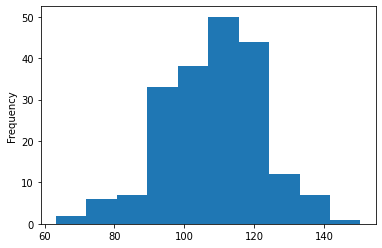

In [ ]:
# Dataframe
df_AB['Valor 2'].plot.hist()

**Ordeno el Dataset**

In [ ]:
df_AB.sort_values(['Valor 1'], ignore_index=True, inplace=True)
df_AB

,Valor 1,Valor 2,Etiqueta
0,56.482980,102.074140,B
1,68.871737,129.342736,B
2,69.909650,67.403390,B
3,70.191345,105.200290,B
4,71.691836,119.087531,B
...,...,...,...
195,116.924546,119.004940,A
196,117.448118,118.886677,A
197,119.392424,119.341826,B
198,121.002551,117.420563,A


**Párametros Estadísticos**

In [ ]:
df_AB.describe()

,Valor 1,Valor 2
count,200.000000,200.000000
mean,95.361846,108.264050
std,11.835856,14.274437
min,56.482980,63.261983
25%,87.724275,98.345314
50%,96.203303,109.557330
75%,103.235942,117.513063
max,121.855754,150.462857


**Definicion y Grafico ROC**

Tipo de dato de x_list ==> <class 'list'>
Tipo de dato de y_list ==> <class 'list'>
Tipo de dato de x ==> <class 'int'>
Tipo de dato de y ==> <class 'int'>


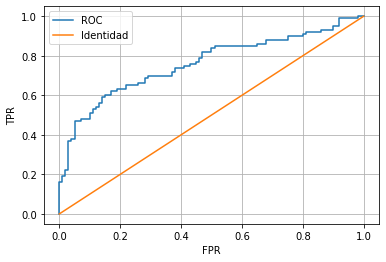

In [ ]:
#Gráfica de la curva ROC
x_list, y_list = ([], [])
print('Tipo de dato de x_list', type(x_list), sep=' ==> ')
print('Tipo de dato de y_list', type(y_list), sep=' ==> ')
x_list.append(0)
y_list.append(0)

x, y = (0, 0)
print('Tipo de dato de x', type(x), sep=' ==> ')
print('Tipo de dato de y', type(y), sep=' ==> ')

for i in range(200):
    if df_AB.iloc[i, 2] == 'B':
        y += 1/100
    else:
        x += 1/100
    x_list.append(x)
    y_list.append(y)


plt.figure()
plt.plot(x_list, y_list, [0,1], [0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend(['ROC', 'Identidad'])

**Dataset con predicciones**

In [ ]:
df_AB = df_AB.assign(Prediccion = 0)
dist = np.sqrt(np.abs(np.array(x_list)-((np.array(x_list)+np.array(y_list))/2))+np.abs(np.array(y_list)-((np.array(x_list)+np.array(y_list))/2)))
print('Tipo de dato de dist', type(dist), sep=' ==> ')

[pos_umbral] = np.where(dist == dist.max())
print('Tipo de dato de pos_umbral', type(pos_umbral), sep=' ==> ')

pos_umbral = pos_umbral[-1] 

Umbral = df_AB.iloc[pos_umbral,0]
print('Tipo de dato de Umbral', type(Umbral), sep=' ==> ')

df_AB['Prediccion'] = [0 if df_AB.iloc[i,0] < Umbral else 1 for i in range(200)]
#df_AB

Tipo de dato de dist ==> <class 'numpy.ndarray'>
Tipo de dato de pos_umbral ==> <class 'numpy.ndarray'>
Tipo de dato de Umbral ==> <class 'numpy.float64'>


In [ ]:
df_pred = df_AB.copy()
print('Tipo de dato de df_pred', type(df_pred), sep=' ==> ')

df_pred['Etiqueta'] = ['A' if x <= Umbral else 'B' for x in df_AB['Valor 2']]

df_AB_pred = pd.DataFrame({'Valor 2': df_AB["Valor 2"].values, 'Etiqueta': df_AB["Etiqueta"].values, 'Predición': df_pred["Etiqueta"].values})

df_AB_pred

Tipo de dato de df_pred ==> <class 'pandas.core.frame.DataFrame'>


,Valor 2,Etiqueta,Predición
0,102.074140,B,B
1,129.342736,B,B
2,67.403390,B,A
3,105.200290,B,B
4,119.087531,B,B
...,...,...,...
195,119.004940,A,B
196,118.886677,A,B
197,119.341826,B,B
198,117.420563,A,B


**Dataset con los Tipos de Error**

In [ ]:
df_AB_pred['Condicion_Predición'] =  ['Falso_Positivo'     if df_AB_pred.iloc[i,1]=='A' and df_AB_pred.iloc[i,2]=='B' else 
                                      'Falso_Negativo'     if df_AB_pred.iloc[i,1]=='B' and df_AB_pred.iloc[i,2]=='A' else 
                                      'Verdadero_Negativo' if df_AB_pred.iloc[i,1]=='A' and df_AB_pred.iloc[i,2]=='A' else
                                      'Verdadero_Positivo' for i in range(200)]
df_AB_pred.sample(10)

,Valor 2,Etiqueta,Predición,Condicion_Predición
28,112.164153,B,B,Verdadero_Positivo
199,136.288397,A,B,Falso_Positivo
146,110.208913,A,B,Falso_Positivo
132,117.368769,B,B,Verdadero_Positivo
181,114.206552,A,B,Falso_Positivo
193,104.634457,A,B,Falso_Positivo
116,113.762573,A,B,Falso_Positivo
58,131.519399,B,B,Verdadero_Positivo
196,118.886677,A,B,Falso_Positivo
120,129.531809,A,B,Falso_Positivo


**Parametros de calidad**

In [ ]:
FP, FN, VN, VP = [np.sum(df_AB_pred['Condicion_Predición'] == TdE) for TdE in ['Falso_Positivo', 'Falso_Negativo', 'Verdadero_Negativo', 'Verdadero_Positivo']]
print('Tipo de dato de FP', type(FP), sep=' ==> ')
print('Tipo de dato de FN', type(FN), sep=' ==> ')
print('Tipo de dato de VN', type(VN), sep=' ==> ')
print('Tipo de dato de VP', type(VP), sep=' ==> ')

print('------------------------------')
print('Falso_Positivo          :', FP)
print('Falso_Negativo          :', FN)
print('Verdadero_Positivo      :', VP)
print('Verdadero_Negativo      :', VN)

print('------------------------------')
TPR = VP / (VP + FN)
FPR = FP / (FP + VN)
PPV = VP / (VP + FP)  
f_score = (2 * TPR * PPV) / (TPR + PPV)
print('Tipo de dato de TPR', type(TPR), sep=' ==> ')
print('Tipo de dato de FPR', type(FPR), sep=' ==> ')
print('Tipo de dato de PPV', type(PPV), sep=' ==> ')
print('Tipo de dato de f_score', type(f_score), sep=' ==> ')

print('------------------------------')
print('Recall                  :', TPR)
print('Tasa de Falsos Positivos:', FPR)
print('Precision               :', PPV)  
print('F-score                 :', f_score)

Tipo de dato de FP ==> <class 'numpy.int64'>
Tipo de dato de FN ==> <class 'numpy.int64'>
Tipo de dato de VN ==> <class 'numpy.int64'>
Tipo de dato de VP ==> <class 'numpy.int64'>
------------------------------
Falso_Positivo          : 95
Falso_Negativo          : 20
Verdadero_Positivo      : 80
Verdadero_Negativo      : 5
------------------------------
Tipo de dato de TPR ==> <class 'numpy.float64'>
Tipo de dato de FPR ==> <class 'numpy.float64'>
Tipo de dato de PPV ==> <class 'numpy.float64'>
Tipo de dato de f_score ==> <class 'numpy.float64'>
------------------------------
Recall                  : 0.8
Tasa de Falsos Positivos: 0.95
Precision               : 0.45714285714285713
F-score                 : 0.5818181818181818


**Definir Dataset de Entrenamiento**

In [ ]:
from sklearn.model_selection import train_test_split

print('Tipo de dato de train_test_split', type(train_test_split), sep=' ==> ')

def dataset_split(df_AB_split, porcentaje_entrenamiento = 50, porcentaje_testeo = 50):
    '''
        dataset_split
            Divide un dataset (df_AB_split) en entrenamiento y test segun porcentajes 
            pasados por parámetros
    '''
    total = df_AB_split.shape[0]
    print('Tipo de dato de total', type(total), sep=' ==> ')
    test_size = porcentaje_testeo/100
    print('Tipo de dato de test_size', type(test_size), sep=' ==> ')
    x_train, x_test, y_train, y_test = train_test_split(df_AB_split.drop('Etiqueta', axis=1).values, df_AB_split['Etiqueta'].values, 
                                                       test_size=test_size, shuffle=True, stratify=df_AB_split['Etiqueta'].values)
    print('Tipo de dato de x_train', type(x_train), sep=' ==> ')
    print('Tipo de dato de x_test', type(x_test), sep=' ==> ')
    print('Tipo de dato de y_test', type(y_test), sep=' ==> ')
    print('Tipo de dato de y_test', type(y_test), sep=' ==> ')

    print(f"Datos de entrenamiento: {y_train.shape[0]} ({porcentaje_entrenamiento}%)")
    print(f"Datos de testeo: {y_test.shape[0]} ({porcentaje_testeo}%)")

    return x_train, x_test, y_train, y_test

Tipo de dato de train_test_split ==> <class 'function'>


In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_AB_pred)

Tipo de dato de total ==> <class 'int'>
Tipo de dato de test_size ==> <class 'float'>
Tipo de dato de x_train ==> <class 'numpy.ndarray'>
Tipo de dato de x_test ==> <class 'numpy.ndarray'>
Tipo de dato de y_test ==> <class 'numpy.ndarray'>
Tipo de dato de y_test ==> <class 'numpy.ndarray'>
Datos de entrenamiento: 100 (50%)
Datos de testeo: 100 (50%)


**Dataset - Entrenamiento (Train)**

In [ ]:
df_AB_train = df_AB_pred[0:50]
print('Tipo de dato de df_AB_train', type(df_AB_train), sep=' ==> ')

df_AB_train[0:10] #  Mostramos algunos datos como resultado

Tipo de dato de df_AB_train ==> <class 'pandas.core.frame.DataFrame'>


,Valor 2,Etiqueta,Predición,Condicion_Predición
0,102.074140,B,B,Verdadero_Positivo
1,129.342736,B,B,Verdadero_Positivo
2,67.403390,B,A,Falso_Negativo
3,105.200290,B,B,Verdadero_Positivo
4,119.087531,B,B,Verdadero_Positivo
5,137.067421,B,B,Verdadero_Positivo
6,109.852910,B,B,Verdadero_Positivo
7,109.579006,B,B,Verdadero_Positivo
8,100.813534,B,B,Verdadero_Positivo
9,87.360260,B,A,Falso_Negativo


**Dataset - Test (Prueba)**

In [ ]:
df_AB_test = df_AB_pred[51:100]
print('Tipo de dato de df_AB_test', type(df_AB_test), sep=' ==> ')

df_AB_test[0:10] #  Mostramos algunos datos como resultado

Tipo de dato de df_AB_test ==> <class 'pandas.core.frame.DataFrame'>


,Valor 2,Etiqueta,Predición,Condicion_Predición
51,126.771439,B,B,Verdadero_Positivo
52,122.465895,A,B,Falso_Positivo
53,116.246916,A,B,Falso_Positivo
54,89.671711,B,A,Falso_Negativo
55,109.704597,A,B,Falso_Positivo
56,94.252599,A,B,Falso_Positivo
57,117.122942,A,B,Falso_Positivo
58,131.519399,B,B,Verdadero_Positivo
59,98.366561,B,B,Verdadero_Positivo
60,103.260222,B,B,Verdadero_Positivo


**Clasificador por K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

ValueError: ignored